<a href="https://colab.research.google.com/github/martinpius/Behind-Keras-Layers-and-Models/blob/main/Tf_Layers_and_Models_Subclassing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive/", force_remount = True)
try:
  COLAB = True
  import tensorflow as tf
  print(f"You are using google colab with tensorflow vaersion: {tf.__version__}")
except Exception as e:
  COLAB = False
  print(f"{type(e)}: {e}\n....please load your drive....")
def time_fmt(t:float = 123.45654)->float:
  h = int(t / (60 * 60))
  m = int(t % (60 * 60)/60)
  s = int(t % 60)
  return f"{h}: {m:>03}: {s:>05.2f}"
print(f".....testing.....testing....testing......\ntime elapsed: {time_fmt()}")

Mounted at /content/drive/
You are using google colab with tensorflow vaersion: 2.4.1
.....testing.....testing....testing......
time elapsed: 0: 002: 03.00


In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import time, os
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('max_rows', 8)
pd.set_option('max_columns', 0)
plt.style.use('fivethirtyeight')

In [ ]:
#Defining the dense layer from the scratch using layer subclassing:
#We first use the shortcut method of ussing self.add_weight

In [ ]:
class DenseLayer(tf.keras.layers.Layer):
  def __init__(self, units = 32, input_dim = 32, name = 'dense_layer', *args, **kwargs):
    super(DenseLayer, self).__init__(name = name, *args, **kwargs)
    self.w = self.add_weight(shape = (units, input_dim), initializer = 'random_normal', name = 'weights', trainable = True)
    self.b = self.add_weight(shape = (units,), initializer = 'zeros', trainable = True, name = 'bias')
  
  def call(self, inputs):
    result = tf.matmul(inputs, self.w) + self.b
    return tf.nn.relu(result)

In [ ]:
x = tf.ones(shape = (2,2), dtype = tf.float32)
dense_layer = DenseLayer(2,1)
out = dense_layer(x)

In [ ]:
print(out)

tf.Tensor(
[[0.06454325 0.06454325]
 [0.06454325 0.06454325]], shape=(2, 2), dtype=float32)


In [ ]:
#We can also define the same layer using the long way format as follow (here we return the sigmoid)
class MyLayer(tf.keras.layers.Layer):
  def __init__(self, units: int = 32, input_dim: int = 32, name = 'dense_layer',*args, **kwargs):
    super(MyLayer, self).__init__(name = name, *args, **kwargs)
    init_wts = tf.random_normal_initializer()
    init_b = tf.zeros_initializer()
    self.w = tf.Variable(initial_value = init_wts(shape = (units, input_dim)), trainable = True, name = 'weights')
    self.b = tf.Variable(initial_value = init_b(shape = (units,)), trainable = True, name = 'bias')
  
  def call(self, inputs):
    result = tf.matmul(inputs, self.w) + self.b
    return tf.nn.sigmoid(result)

In [ ]:
layer_dense = MyLayer(4,1)
x = tf.ones(shape = (2,4))
out = layer_dense(x)
print(out)

tf.Tensor(
[[0.47845197 0.47845197 0.47845197 0.47845197]
 [0.47845197 0.47845197 0.47845197 0.47845197]], shape=(2, 4), dtype=float32)


In [ ]:
assert layer_dense.weights ==[layer_dense.w, layer_dense.b] #tracking/accessing the weights in this layer

In [ ]:
#Adding a none-trainable weight to a layer:

In [ ]:
class MixedLayer(tf.keras.layers.Layer):
  def __init__(self, units: int = 32, input_dim: int = 32, name = 'mixture weights', *args, **kwargs)->None:
    super(MixedLayer, self).__init__(name = name, *args, **kwargs)
    self.w = self.add_weight(shape = (units, input_dim), initializer = 'random_normal', trainable = True, name = 'wt_trainable')
    self.w_u = self.add_weight(shape = (units,), initializer = 'random_normal', trainable = False, name = 'untrainable_wts')
    self.b = self.add_weight(shape = (units,), initializer = 'zeros', trainable = True, name = 'bias')
  
  def call(self, inputs):
    opt = self.w_u.assign_add(tf.reduce_sum((tf.matmul(inputs, self.w) + self.b),axis = 0))
    return tf.nn.relu(opt)


In [ ]:
mixedlayer = MixedLayer()

In [ ]:
x = tf.ones(shape = (10,32), dtype = float)
out = mixedlayer(x)

In [ ]:
print(out)

tf.Tensor(
[0.         0.         0.         1.8673167  2.3526785  3.455099
 0.         4.5461836  0.7618844  0.         0.         1.7038126
 0.         0.         0.         0.         0.         0.
 0.17043029 2.751229   0.         0.         0.         0.
 0.         0.         0.         0.62663645 0.31510958 0.44988236
 0.         0.33857644], shape=(32,), dtype=float32)


In [ ]:
assert mixedlayer.non_trainable_weights == [mixedlayer.w_u]

In [ ]:
#print out all the weights in the model

In [ ]:
print(mixedlayer.weights)

[<tf.Variable 'wt_trainable:0' shape=(32, 32) dtype=float32, numpy=
array([[ 0.05411708,  0.02875854,  0.03101063, ...,  0.00322311,
        -0.01329252, -0.00714218],
       [ 0.03507769, -0.00203639, -0.02372039, ..., -0.01165989,
         0.15007246, -0.04453201],
       [ 0.03252315,  0.00105371,  0.01346861, ...,  0.00253847,
        -0.06718918, -0.03090009],
       ...,
       [ 0.02033764,  0.00769625,  0.04484361, ...,  0.00372322,
        -0.0269817 ,  0.02565583],
       [ 0.04258398, -0.0187911 ,  0.01430888, ...,  0.02457965,
        -0.01576806,  0.07027715],
       [-0.06853613, -0.01856445,  0.05765331, ..., -0.00902725,
        -0.11704353, -0.08243842]], dtype=float32)>, <tf.Variable 'bias:0' shape=(32,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)>, <tf.Variable 'untrainable_wts:0' shape=(32,) dtype=float32, numpy=
array([-0.426

In [ ]:
#Differing weights creation to be defined later during training the model(since we may not be sure of batch sizes to read-in)

In [ ]:
class MyDenseLayer(tf.keras.layers.Layer):
  def __init__(self, units: int = 32, name = 'dense_layer', *args, **kwargs)->None:
    super(MyDenseLayer, self).__init__(name = name, *args, **kwargs)
    self.units = units
  
  def build(self, input_dim):
    self.w = self.add_weight(shape = (self.units, input_dim[-1]), initializer = 'random_normal', trainable = True, name = 'weights')
    self.b = self.add_weight(shape = (self.units,), initializer = 'zeros', trainable = True, name = 'bias')
  
  def call(self, inputs):
    result = tf.matmul(inputs, self.w) + self.b
    return tf.nn.relu(result)

In [ ]:
mydense = MyDenseLayer(32)

In [ ]:
x = tf.ones(shape = (10,32), dtype = tf.float32)

In [ ]:
out = mydense(x)

In [ ]:
print(out.shape)

(10, 32)


In [ ]:
assert mydense.trainable_weights == [mydense.w, mydense.b]

In [ ]:
#Model subclassing: A simple multi-layer perceptron using model subclassing

In [ ]:
class MLP(tf.keras.models.Model):
  def __init__(self, name = 'mlp', *args, **kwargs):
    super(MLP, self).__init__(name = name, *args, **kwargs)
    self.dense1 = tf.keras.layers.Dense(units = 32, activation = 'relu', name = 'dense1')
    self.dense2 = tf.keras.layers.Dense(units = 16, activation = 'relu', name = 'dense2')
    self.outputs = tf.keras.layers.Dense(units = 1, activation = 'linear', name = 'outputs')
  
  def call(self, inputs_shape):
    inputs = tf.keras.Input(shape = inputs_shape)
    x = self.dense1(inputs)
    x = self.dense2(x)
    outputs = self.outputs(x)
    model = tf.keras.Model(inputs = inputs, outputs = outputs)
    return model

In [ ]:
mymodel = MLP(name = 'mlp')

In [ ]:
mlp = mymodel((10,))

In [ ]:
mlp.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
dense1 (Dense)               (None, 32)                352       
_________________________________________________________________
dense2 (Dense)               (None, 16)                528       
_________________________________________________________________
outputs (Dense)              (None, 1)                 17        
Total params: 897
Trainable params: 897
Non-trainable params: 0
_________________________________________________________________


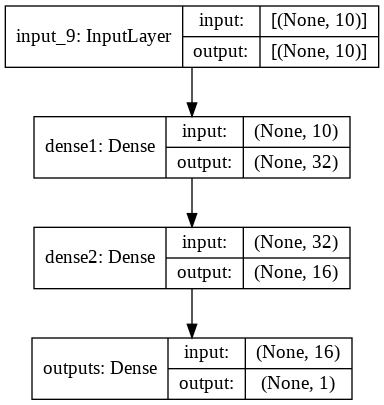

In [ ]:
tf.keras.utils.plot_model(model = mlp, to_file = 'mlp.png', show_shapes = True)

In [ ]:
#CNN using model subclassing: We construct a simple cnn architecture using model subclassing

In [ ]:
class CNNSimple(tf.keras.models.Model):
  def __init__(self, name = 'cnn_simple', *args, **kwargs):
    super(CNNSimple, self).__init__(name = name, *args, **kwargs)
    self.conv1 = tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu')
    self.conv2 = tf.keras.layers.Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu')
    self.drop_out = tf.keras.layers.Dropout(rate = 0.5)
    self.flat = tf.keras.layers.Flatten()
    self.dens1 = tf.keras.layers.Dense(units = 32, activation = 'relu')
    self.outputs = tf.keras.layers.Dense(units = 5, activation = 'softmax')
  def call(self, input_shape):
    inputs = tf.keras.Input(shape = input_shape)
    x = self.conv1(inputs)
    x = self.conv2(x)
    x = self.drop_out(x)
    x = self.flat(x)
    x = self.dens1(x)
    outputs = self.outputs(x)
    model = tf.keras.Model(inputs = inputs, outputs = outputs, name = 'cnn_simple')
    return model

In [ ]:
cnn_simple = CNNSimple(name = 'cnn_simple')

In [ ]:
model = cnn_simple((28,28,1))

In [ ]:
model.summary()

Model: "cnn_simple"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 16)        4624      
_________________________________________________________________
dropout_3 (Dropout)          (None, 24, 24, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                294944    
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 1

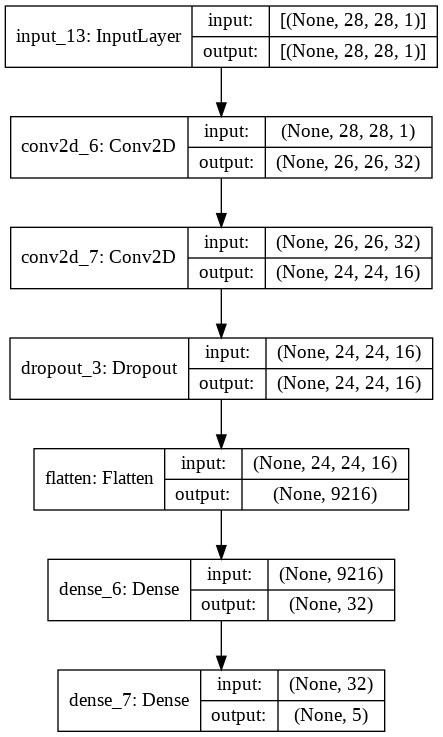

In [ ]:
tf.keras.utils.plot_model(model = model, to_file = 'cnn_simple.png', show_shapes = True)